<a href="https://colab.research.google.com/github/amaanchau/stock-predictor/blob/main/stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [48]:
#Import Libs
import math
import pandas_datareader.data as pdr
import numpy as np
import pandas as pd
import yfinance as yfin
yfin.pdr_override()
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [49]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
#Get stock quote
df = pdr.get_data_yahoo('AAPl', data_source='yahoo',start='2012-01-01', end = '2022-09-01')
#Show data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.540047,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.607440,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.747406,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.880663,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.860236,394024400
...,...,...,...,...,...,...
2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78961000
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.380005,73314000


In [51]:
#Get num of rows and columns
df.shape

(2684, 6)

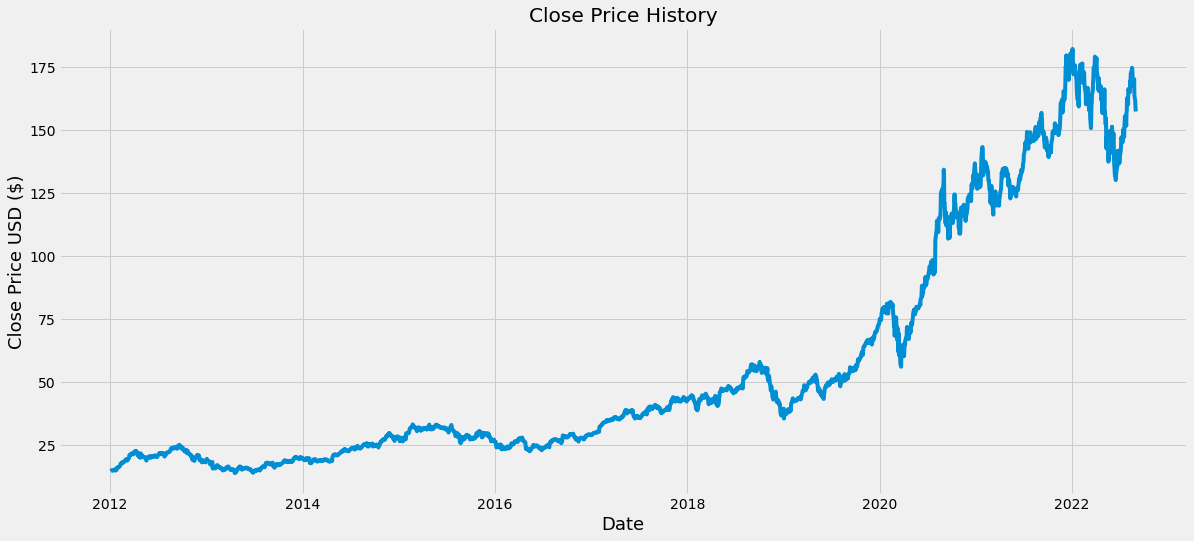

In [52]:
#visualize closing hist
plt.figure(figsize=(18,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [53]:
#Create a new df with only close column
data = df.filter(['Close'])
#convert df to a numpy arr
dataset = data.values
#get num of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len


2148

In [54]:
#Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.87724811],
       [0.86255118],
       [0.85249539]])

In [55]:
#Create the training data set
#create scaled training data set
train_data = scaled_data[0:training_data_len,:]
#split data into x and y data sets
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]



In [56]:
#convert x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

x_train.shape


(2088, 60, 1)

In [59]:
#build lstm model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1) ))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [66]:
#compile model
model.compile(optimizer='adam',loss='mean_squared_error')

In [67]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2088/2088 [==============================] - 70s 32ms/step - loss: 2.6877e-04


SyntaxError: ignored